In [1]:
import pandas as pd
import torch

In [4]:
data = pd.read_csv('data/거제도.csv', encoding='cp949')
data

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22104,2003-01-01,8.5,1023.8,52.0,2.9,15.9,2.0,0.7,1.0,3.3,7.6,9.5
1,22104,2003-01-02,5.6,1028.7,63.0,4.4,16.6,1.9,0.7,0.8,2.2,8.2,10.9
2,22104,2003-01-03,7.5,1018.6,64.0,5.2,16.9,1.8,0.6,0.8,3.1,9.2,11.8
3,22104,2003-01-04,10.3,1019.7,57.0,-0.6,16.7,2.1,0.7,0.9,2.8,12.5,75.0
4,22104,2003-01-05,8.8,1027.0,50.0,-2.6,15.8,2.0,0.7,0.8,2.6,9.7,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,22104,2022-12-27,6.7,1026.1,44.0,7.4,15.7,1.9,1.2,1.5,2.4,5.4,6.8
7054,22104,2022-12-28,6.7,1027.9,54.0,6.3,15.3,1.5,1.0,1.2,1.9,4.5,5.1
7055,22104,2022-12-29,6.8,1031.0,58.0,4.8,15.0,1.3,0.9,1.2,1.9,4.1,5.3
7056,22104,2022-12-30,5.4,1030.7,55.0,5.7,15.1,1.0,0.7,0.9,1.5,3.9,4.4


In [5]:
data = data.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)'})
data=data.set_index(pd.to_datetime(data.date)) # Date를 인덱스로
data=data[['Apress(hPa)','Atemp(°C)','Stemp(°C)']] # Column 재정리
data

,Apress(hPa),Atemp(°C),Stemp(°C)
date,,,
2003-01-01,1023.8,2.9,15.9
2003-01-02,1028.7,4.4,16.6
2003-01-03,1018.6,5.2,16.9
2003-01-04,1019.7,-0.6,16.7
2003-01-05,1027.0,-2.6,15.8
...,...,...,...
2022-12-27,1026.1,7.4,15.7
2022-12-28,1027.9,6.3,15.3
2022-12-29,1031.0,4.8,15.0


In [6]:
monthly_avg_temp = data['Stemp(°C)'].resample('M').mean()
monthly_avg_temp_tensor = torch.tensor(monthly_avg_temp.values)

In [8]:
monthly_avg_temp 

date
2003-01-31    16.141935
2003-02-28    17.575000
2003-03-31    17.146429
2003-04-30    16.993333
2003-05-31    17.165000
                ...    
2022-08-31    25.603226
2022-09-30    24.853333
2022-10-31    22.393548
2022-11-30    20.133333
2022-12-31    17.177419
Freq: M, Name: Stemp(°C), Length: 240, dtype: float64

In [9]:
import matplotlib.pyplot as plt


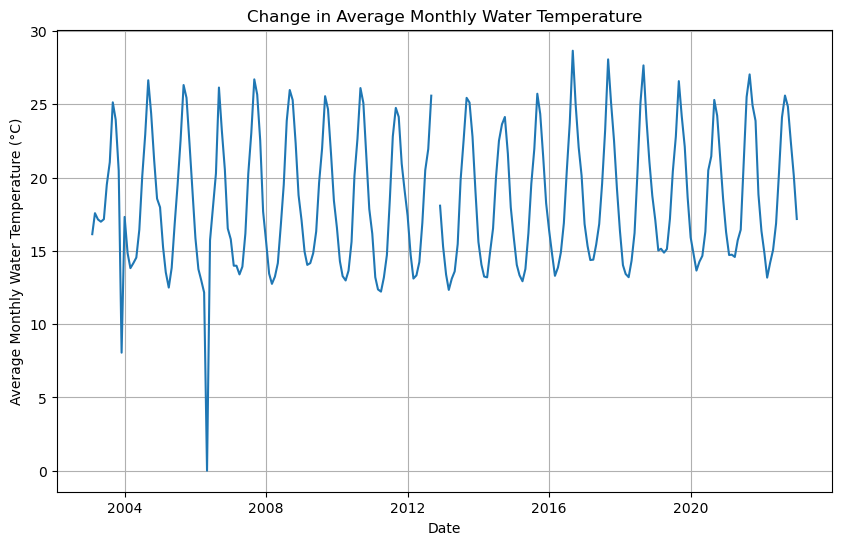

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()